In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("BlackFriday.csv")

In [3]:
data.drop(columns = ["User_ID","Product_ID"],inplace=True)


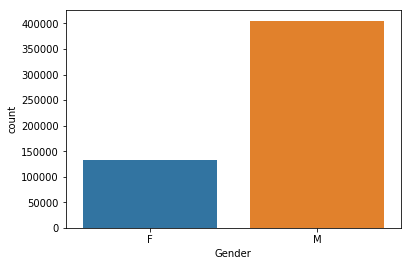

In [5]:
sns.countplot(data['Gender'])


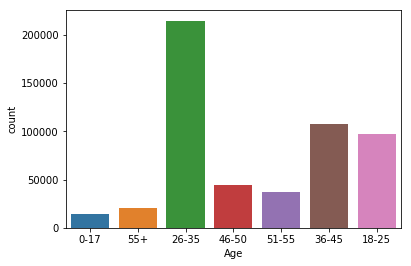

In [6]:
sns.countplot(data['Age'])


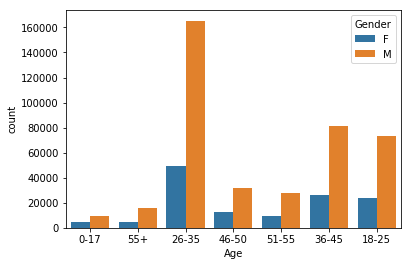

In [9]:
sns.countplot(data['Age'],hue=data['Gender'])


In [11]:
data['combined_G_M'] = data.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)

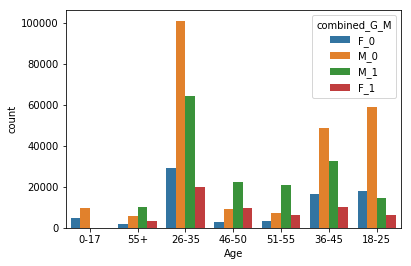

In [12]:
sns.countplot(data['Age'],hue=data['combined_G_M'])


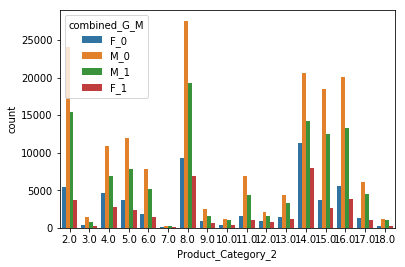

In [13]:
sns.countplot(data['Product_Category_2'],hue=data['combined_G_M'])


In [17]:
def plot(group,column,plot):
    ax=plt.figure(figsize=(12,6))
    data.groupby(group)[column].sum().sort_values().plot(plot)

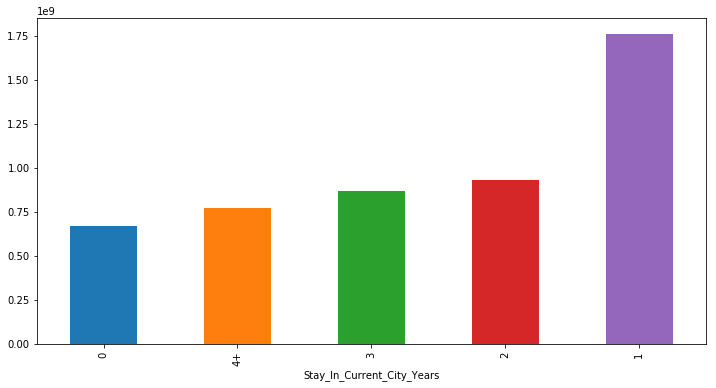

In [18]:
plot('Stay_In_Current_City_Years','Purchase','bar')


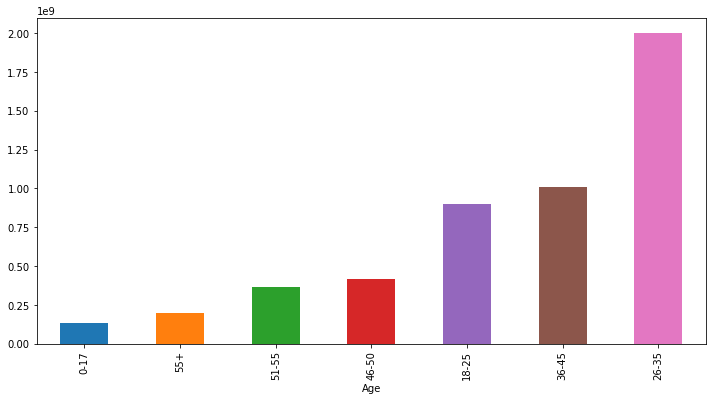

In [19]:
plot('Age','Purchase','bar')


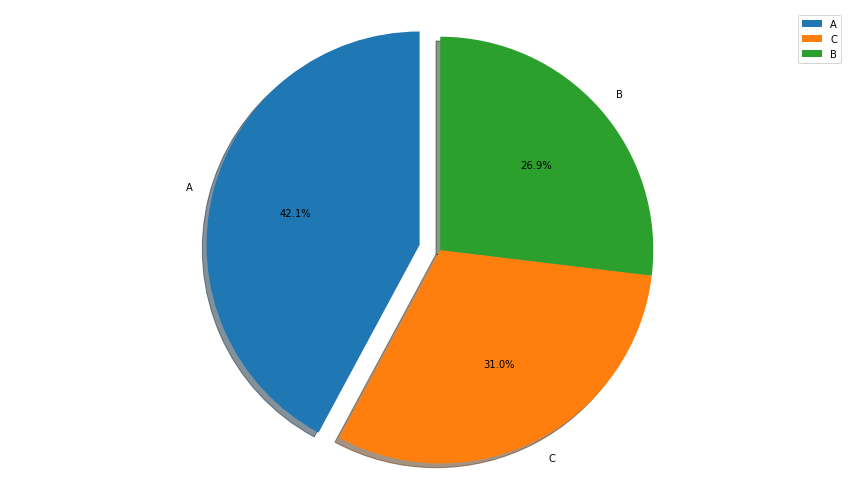

In [21]:
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data['City_Category'].value_counts(),explode=explode, labels=data['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

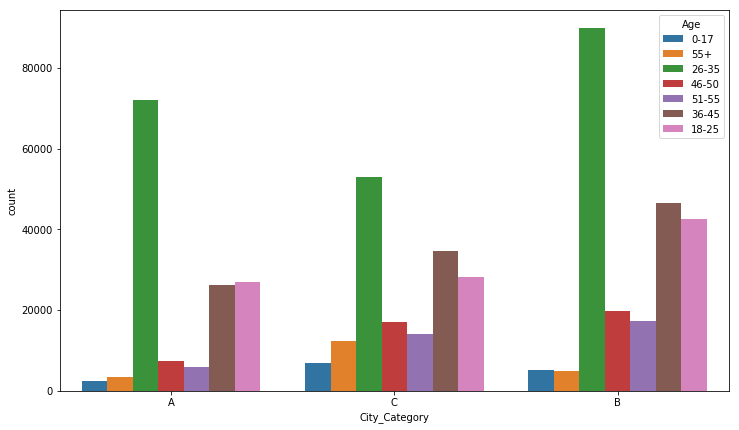

In [23]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(data['City_Category'],hue=data['Age'])

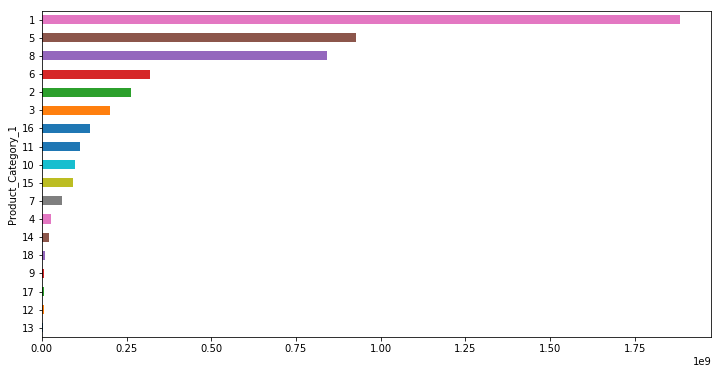

In [24]:
plot('Product_Category_1','Purchase','barh')


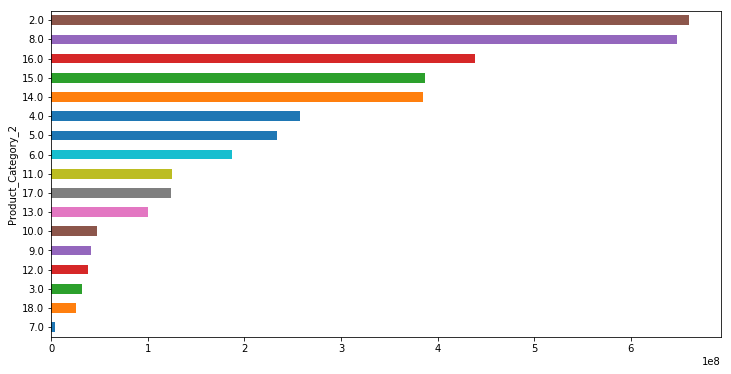

In [25]:
plot('Product_Category_2','Purchase','barh')


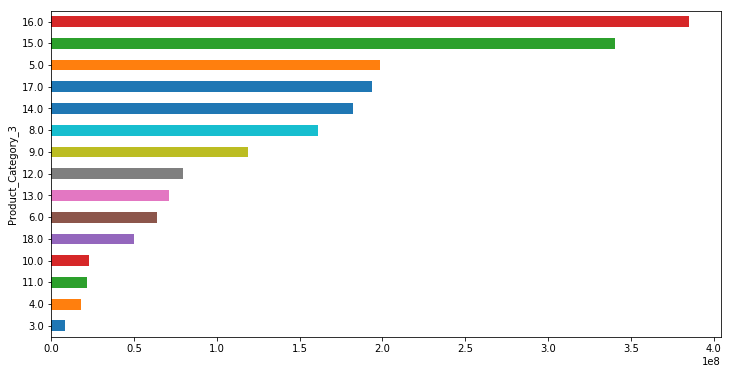

In [26]:
plot('Product_Category_3','Purchase','barh')


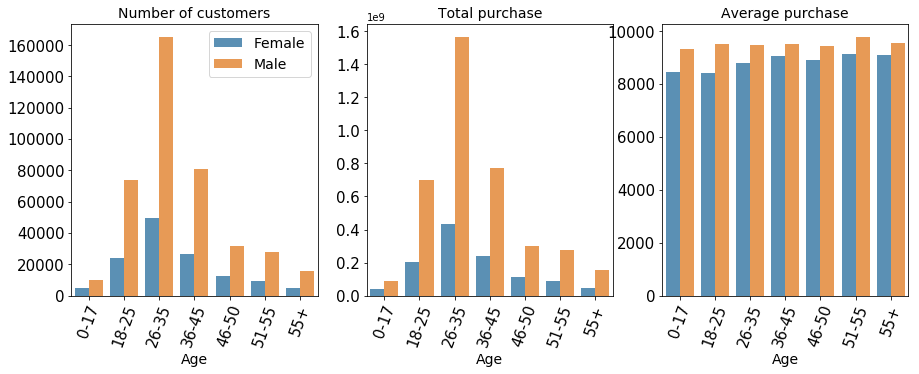

In [33]:
data_Tpurchase_by_Age = data.groupby(['Age','Gender']).agg({'Purchase':np.sum}).reset_index()
age_order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']
data_Apurchase_by_Age = data.groupby(['Age','Gender']).agg({'Purchase':np.mean}).reset_index()
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot('Age',order=age_order,hue='Gender',data=data,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Number of customers',fontsize=14)
plt.legend(['Female','Male'],frameon=True,fontsize=14)
plt.tick_params(labelsize=15)
plt.subplot(132)
df_Tpurchase_by_Age = data.groupby(['Age','Gender']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=data_Tpurchase_by_Age,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Total purchase',fontsize=14)
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)
plt.subplot(133)
df_Apurchase_by_Age = data.groupby(['Age','Gender']).agg({'Purchase':np.mean}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=data_Apurchase_by_Age,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Average purchase',fontsize=14)
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)
